#Car purchase prediction




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


Data Preprocessing


In [ ]:
df.shape

(1000, 5)

In [ ]:
df.Purchased.value_counts()


0    598
1    402
Name: Purchased, dtype: int64

In [ ]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [ ]:
df = df.drop(columns = ['User ID'],axis = 1)

In [ ]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


Data visualization

# Univariate analysis

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

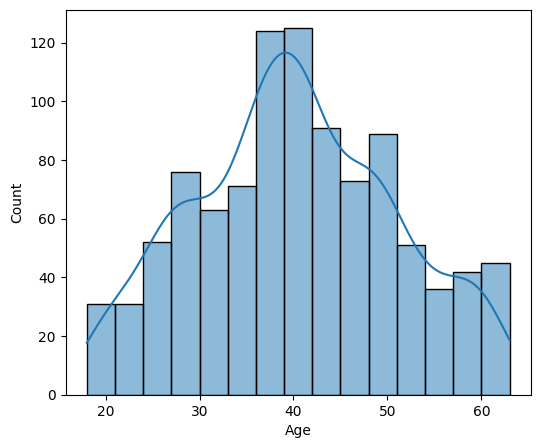

In [ ]:
fig = plt.figure(figsize = (6, 5))

sns.histplot(data = df, x = "Age", kde = True)

plt.show()

# Bivariate analysis


<Axes: xlabel='Age', ylabel='AnnualSalary'>

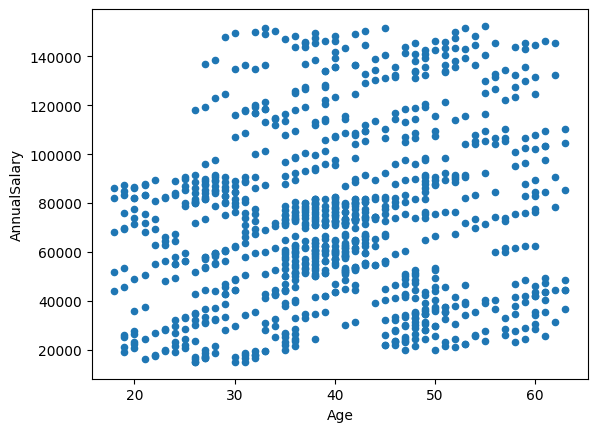

In [ ]:
df.plot.scatter(x='Age', y='AnnualSalary')

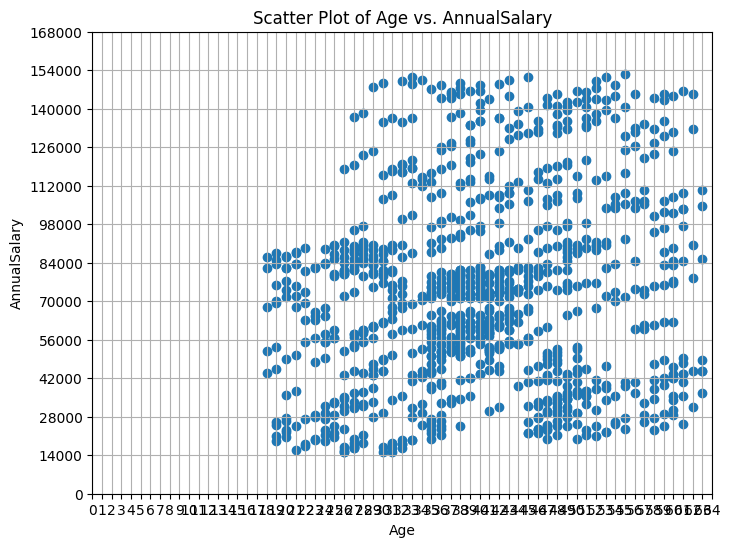

In [ ]:
import matplotlib.pyplot as plt
# Calculate the minimum and maximum values for Age and AnnualSalary
min_age = df['Age'].min()
max_age = df['Age'].max()
min_salary = df['AnnualSalary'].min()
max_salary = df['AnnualSalary'].max()

# Define the x-axis limits and ticks
x_axis_start = 0
x_axis_increment = 1

# Calculate the upper limit for the x-axis based on the data
x_axis_end = max_age + x_axis_increment

# Define the y-axis limits and ticks
y_axis_start = 0
y_axis_increment = 14000
y_axis_end = max_salary + y_axis_increment

# Create a scatter plot with custom axis limits and ticks
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['AnnualSalary'])

# Set the limits for the x and y axes based on the starting values
plt.xlim(x_axis_start, x_axis_end)
plt.ylim(y_axis_start, y_axis_end)

# Define the x-axis ticks
x_ticks = range(x_axis_start, x_axis_end + x_axis_increment, x_axis_increment)

# Define the y-axis ticks
y_ticks = range(y_axis_start, y_axis_end + y_axis_increment, y_axis_increment)

# Set the x-axis and y-axis ticks
plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Label the axes
plt.xlabel('Age')
plt.ylabel('AnnualSalary')
plt.grid(True)
plt.title("Scatter Plot of Age vs. AnnualSalary")
plt.show()

In [ ]:
# 18 to 63 age
# 14000> salary

# Multivariate Analysis


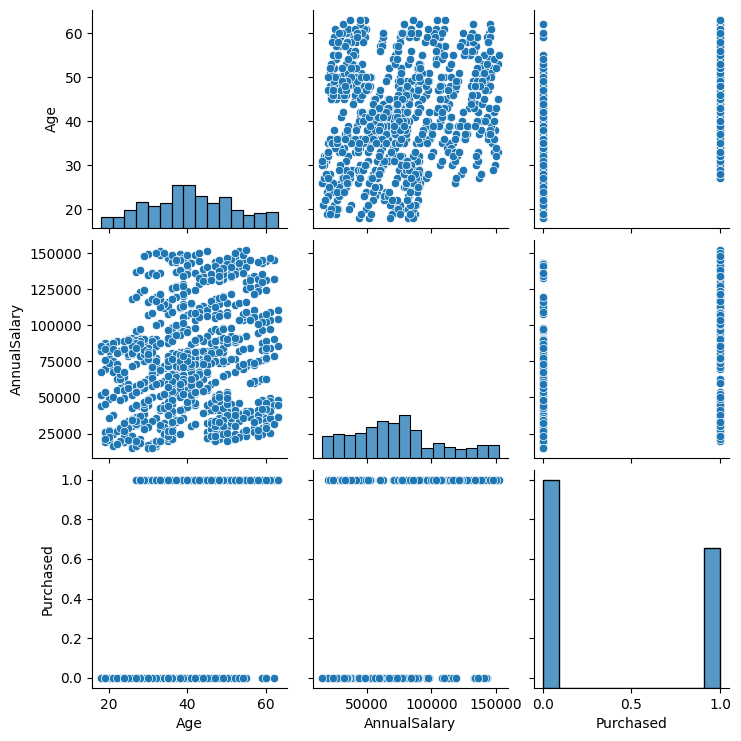

In [ ]:
sns.pairplot(df)

<Axes: >

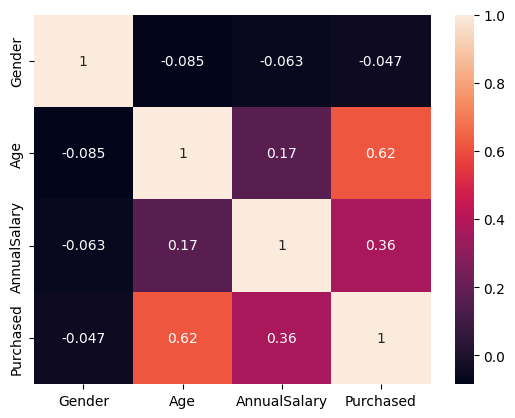

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

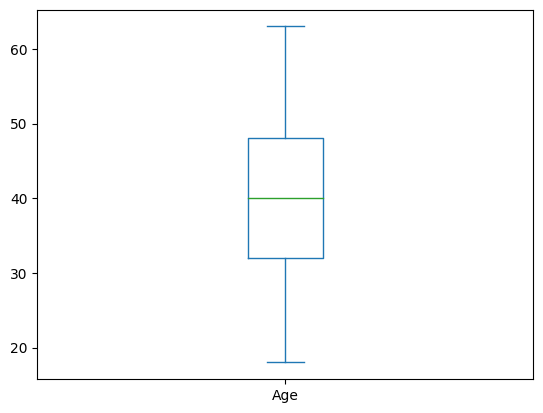

In [ ]:
df['Age'].plot.box()


<Axes: >

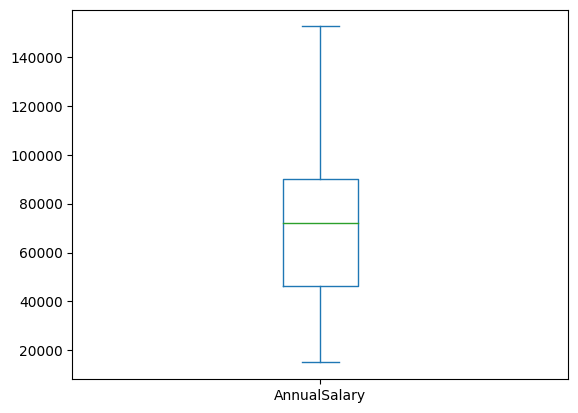

In [ ]:

df['AnnualSalary'].plot.box()

<Axes: >

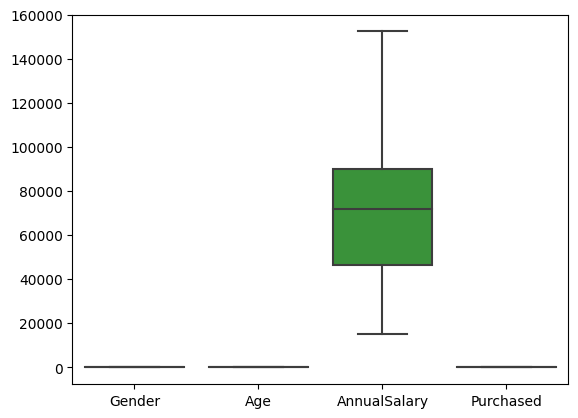

In [ ]:
sns.boxplot(df)

Outlier Detection


In [ ]:
# Calculate the interquartile range (IQR)
Q1 = df['AnnualSalary'].quantile(0.25)
Q3 = df['AnnualSalary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count the outliers
outliers = df[(df['AnnualSalary'] < lower_bound) | (df['AnnualSalary'] > upper_bound)]
num_outliers = len(outliers)

print("Number of outliers in AnnualSalary:", num_outliers)

Number of outliers in AnnualSalary: 0


# Understainding data

<BarContainer object of 1000 artists>

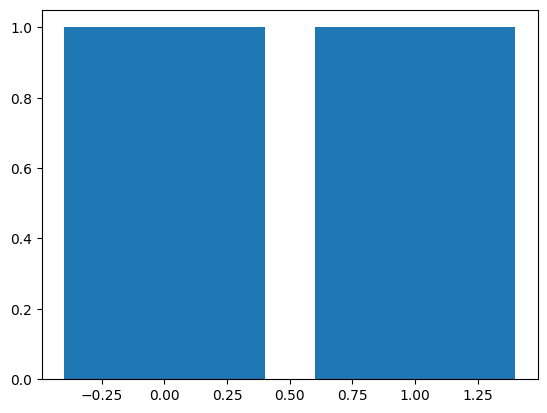

In [ ]:
plt.bar(df.Gender,df.Purchased)

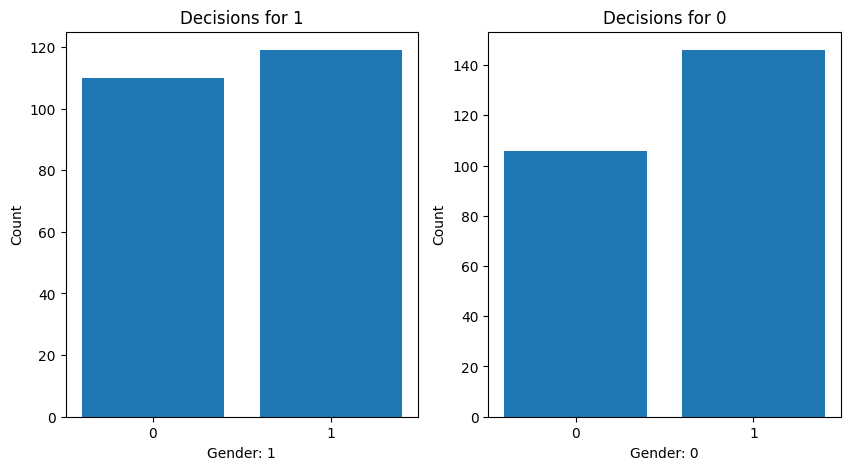

In [ ]:
data = pd.DataFrame(df)

# Calculate the average salary
average_salary = data["AnnualSalary"].mean()

# Filter the DataFrame to get people with salaries greater than the average salary
high_salary_df = data[data["AnnualSalary"] > average_salary]

# Group the data by "Gender" and calculate the counts of "Purchased"
grouped_counts = high_salary_df.groupby(["Gender", "Purchased"]).size().unstack(fill_value=0)

# Get unique gender values
genders = data["Gender"].unique()

# Create two side-by-side bar plots for each gender
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, gender in enumerate(genders):
    data = grouped_counts.loc[gender]
    x = np.arange(len(data))
    axs[i].bar(x, data, tick_label=data.index)
    axs[i].set_xlabel(f"Gender: {gender}")
    axs[i].set_ylabel("Count")
    axs[i].set_title(f"Decisions for {gender}")

# Show the plo

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [ ]:
df.Gender = le.fit_transform(df.Gender)

In [ ]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


# Descriptive analysis

In [ ]:
df.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,0.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


In [ ]:
df.corr()

,Gender,Age,AnnualSalary,Purchased
Gender,1.000000,-0.084760,-0.063301,-0.047211
Age,-0.084760,1.000000,0.166042,0.616036
AnnualSalary,-0.063301,0.166042,1.000000,0.364974
Purchased,-0.047211,0.616036,0.364974,1.000000


<Axes: >

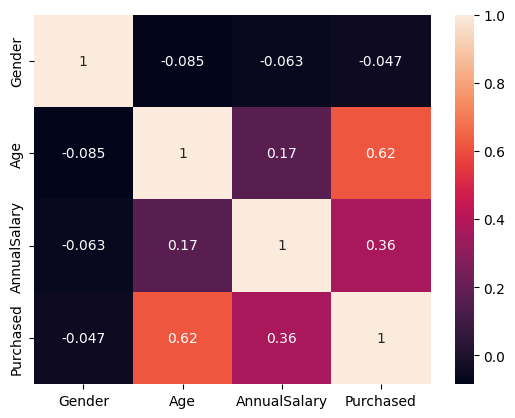

In [ ]:
sns.heatmap(df.corr(),annot =True)

In [ ]:
df.corr().Purchased.sort_values(ascending=False)

Purchased       1.000000
Age             0.616036
AnnualSalary    0.364974
Gender         -0.047211
Name: Purchased, dtype: float64

In [ ]:
df.dtypes

Gender          int64
Age             int64
AnnualSalary    int64
Purchased       int64
dtype: object

In [ ]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


Data Scaling and Splitting

In [ ]:
## X and y split

X =df.drop(columns =['Purchased'],axis =1)

In [ ]:
X.head()

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000


In [ ]:
y =df.Purchased
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [ ]:
 scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
 scaled_x.head()

,Gender,Age,AnnualSalary
0,1.0,0.377778,0.036364
1,1.0,0.488889,0.207273
2,1.0,0.688889,0.429091
3,1.0,0.488889,0.672727
4,1.0,0.155556,0.465455


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.2,random_state = 0)

In [ ]:
x_train.shape

(800, 3)

In [ ]:
x_test.shape

(200, 3)

#Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
pred
y_test

LogisticRegression()

In [ ]:
## Model building

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [ ]:
y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
print('Testing accuracy = ',accuracy_score(y_test,pred))


Testing accuracy =  0.86


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are your training and testing sets

# Regression Model
regression_model = LogisticRegression()
regression_model.fit(x_train, y_train)

# Predictions for regression model
regression_pred = regression_model.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, regression_pred)
mse = mean_squared_error(y_test, regression_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, regression_pred)

print("Regression Model Metrics:")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Classification Model
classification_model = LogisticRegression()
classification_model.fit(x_train, y_train)

# Predictions for classification model
classification_pred = classification_model.predict(x_test)

# Calculate classification metrics
conf_matrix = confusion_matrix(y_test, classification_pred)
accuracy = accuracy_score(y_test, classification_pred)
class_report = classification_report(y_test, classification_pred)

print("\nClassification Model Metrics:")
print(f'Confusion Matrix:\n \n{conf_matrix}')
print(f'Accuracy: \n {accuracy}')
print(f'\n Classification Report:\n \n{class_report}')


Regression Model Metrics:
MAE: 0.14
MSE: 0.14
RMSE: 0.37416573867739417
R2 Score: 0.4141646615754787

Classification Model Metrics:
Confusion Matrix:
 
[[114   7]
 [ 21  58]]
Accuracy: 
 0.86

 Classification Report:
 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       121
           1       0.89      0.73      0.81        79

    accuracy                           0.86       200
   macro avg       0.87      0.84      0.85       200
weighted avg       0.86      0.86      0.86       200



In [ ]:
model.predict([[1,35,75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

#Random Forest classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
model1=RandomForestClassifier(criterion='entropy')
model1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_predict_1=model1.predict(x_test)
y_predict_train=model1.predict(x_train)

In [ ]:
y_predict_1

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [ ]:
print('Testing accuracy = ',accuracy_score(y_test,y_predict_1))


Testing accuracy =  0.925


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are your training and testing sets

# Regression Model
regression_model = RandomForestClassifier(criterion='entropy')
regression_model.fit(x_train, y_train)

# Predictions for regression model
regression_pred = regression_model.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, regression_pred)
mse = mean_squared_error(y_test, regression_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, regression_pred)

print("Regression Model Metrics:")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Classification Model
classification_model = RandomForestClassifier(criterion='entropy')
classification_model.fit(x_train, y_train)

# Predictions for classification model
classification_pred = classification_model.predict(x_test)

# Calculate classification metrics
conf_matrix = confusion_matrix(y_test, classification_pred)
accuracy = accuracy_score(y_test, classification_pred)
class_report = classification_report(y_test, classification_pred)

print("\nClassification Model Metrics:\n")
print(f'Confusion Matrix:\n \n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n \n{class_report}')


Regression Model Metrics:
MAE: 0.075
MSE: 0.075
RMSE: 0.27386127875258304
R2 Score: 0.6861596401297207

Classification Model Metrics:

Confusion Matrix:
 
[[112   9]
 [  8  71]]
Accuracy: 0.915
Classification Report:
 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       121
           1       0.89      0.90      0.89        79

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



In [ ]:
model1.predict([[0,35,75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

# Decision Tree classifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')
model2.fit(x_train,y_train)
y_predict_2=model2.predict(x_test)
y_test
y_predict_2
y_predict_train=model2.predict(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [ ]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict_2=model2.predict(x_test)

In [ ]:
y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [ ]:
y_predict_2

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [ ]:
y_predict_train=model2.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Testing Accuracy = ', accuracy_score(y_test,y_predict_2))


Testing Accuracy =  0.925


In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train are your training sets
# y_test is your test set for evaluation

# Regression Model
regression_model = DecisionTreeRegressor(max_depth=4)
regression_model.fit(x_train, y_train)

# Predictions for regression model
regression_pred_test = regression_model.predict(x_test)
regression_pred_train = regression_model.predict(x_train)

# Calculate regression metrics
mae = mean_absolute_error(y_test, regression_pred_test)
mse = mean_squared_error(y_test, regression_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, regression_pred_test)

print("Regression Model Metrics:")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Classification Model
classification_model = DecisionTreeClassifier(max_depth=4, splitter='best', criterion='entropy')
classification_model.fit(x_train, y_train)

# Predictions for classification model
classification_pred_test = classification_model.predict(x_test)

# Calculate classification metrics
conf_matrix = confusion_matrix(y_test, classification_pred_test)
accuracy = accuracy_score(y_test, classification_pred_test)
class_report = classification_report(y_test, classification_pred_test)

print("\nClassification Model Metrics : \n")
print(f'Confusion Matrix:\n \n{conf_matrix}\n')
print(f'Accuracy: \n {accuracy}\n')
print(f'Classification Report:\n \n{class_report}')


Regression Model Metrics:
MAE: 0.11802618416066693
MSE: 0.06098884234518473
RMSE: 0.2469591916596439
R2 Score: 0.7447898636042066

Classification Model Metrics : 

Confusion Matrix:
 
[[116   5]
 [ 10  69]]

Accuracy: 
 0.925

Classification Report:
 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       121
           1       0.93      0.87      0.90        79

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [ ]:
model2.predict([[0,19,30000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Hyper tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming x_train, x_test, y_train, and y_test are your training and testing sets

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the model, hyperparameter grid, and cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
val_predictions = best_dt_model.predict(x_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)

print(f'Validation Accuracy: {val_accuracy}')

# Use the best model to make predictions on the test set
test_predictions = best_dt_model.predict(x_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Test Accuracy: {test_accuracy}')


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Validation Accuracy: 0.91875
Test Accuracy: 0.885


# Kernel SVM


In [ ]:
from sklearn.svm import SVC #Kernel SVM
# Create an SVM model with a linear kernel
model3 = SVC(kernel='linear')
# Fit the model on the training data
model3.fit(x_train, y_train)
y_test
# Make predictions on the test data
y_predict_3 = model3.predict(x_test)
# Make predictions on the training data (if needed)
y_predict_train = model3.predict(x_train)

In [ ]:
from sklearn.svm import SVC #Kernel SVM
# Create an SVM model with a linear kernel
model3 = SVC(kernel='linear')
# Fit the model on the training data
model3.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [ ]:
# Make predictions on the test data
y_predict_3 = model3.predict(x_test)

In [ ]:
# Make predictions on the training data (if needed)
y_predict_train = model3.predict(x_train)

In [ ]:
model3.predict([[0,19,30000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
print('Testing accuracy = ',accuracy_score(y_test,y_predict_3))

Testing accuracy =  0.865


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, and y_test are your training and testing sets

# Regression Model
regression_model = SVC(kernel='linear')
regression_model.fit(x_train, y_train)

# Predictions for regression model
regression_pred = regression_model.predict(x_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, regression_pred)
mse = mean_squared_error(y_test, regression_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, regression_pred)

print("Regression Model Metrics: \n")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Classification Model
classification_model = SVC(kernel='linear')
classification_model.fit(x_train, y_train)

# Predictions for classification model
classification_pred = classification_model.predict(x_test)

# Calculate classification metrics
conf_matrix = confusion_matrix(y_test, classification_pred)
accuracy = accuracy_score(y_test, classification_pred)
class_report = classification_report(y_test, classification_pred)

print("\nClassification Model Metrics:\n")
print(f'Confusion Matrix:\n{conf_matrix} \n')
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{class_report}')


Regression Model Metrics: 

MAE: 0.135
MSE: 0.135
RMSE: 0.3674234614174767
R2 Score: 0.43508735223349737

Classification Model Metrics:

Confusion Matrix:
[[116   5]
 [ 22  57]] 

Accuracy: 0.865

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       121
           1       0.92      0.72      0.81        79

    accuracy                           0.86       200
   macro avg       0.88      0.84      0.85       200
weighted avg       0.87      0.86      0.86       200



#Import pickle


In [ ]:
import pickle


In [ ]:
pickle.dump(model3,open('car_.pkl','wb'))